In [ ]:
pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"chayan6","key":"0bceac446d4a5b9c9ad29fd68c50bcaa"}'}

In [ ]:
!ls



'kaggle (2).json'   sample_data


In [ ]:
!mkdir -p ~/.kaggle
!cp 'kaggle (2).json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list


ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
abdulmalik1518/mobiles-dataset-2025                         Mobiles Dataset (2025)                           20KB  2025-02-18 06:50:24           7919        146  1.0              
asinow/car-price-dataset                                    Car Price Dataset                               135KB  2025-01-26 19:53:28          25058        392  1.0              
mahmoudelhemaly/students-grading-dataset                    Student Performance & Behavior Dataset          508KB  2025-02-17 17:38:46           6138        108  1.0              
meharshanali/walmart-stocks-data-2025                       Walmart Stocks Data 2025                

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 70% 18.0M/25.7M [00:00<00:00, 80.9MB/s]
100% 25.7M/25.7M [00:00<00:00, 93.0MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('imdb-dataset-of-50k-movie-reviews.zip', 'r') as zip_ref:
    zip_ref.extractall('.')


In [ ]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    words = text.split()
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

Applying preprocessing


In [ ]:
df['cleaned_review'] = df['review'].apply(preprocess_text)

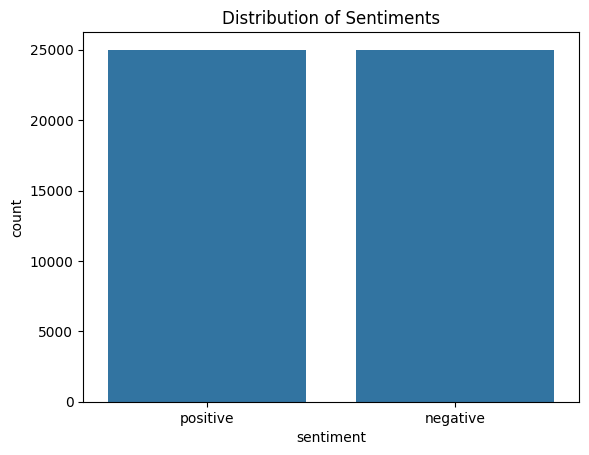

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of Sentiments")
plt.show()

Visualisation

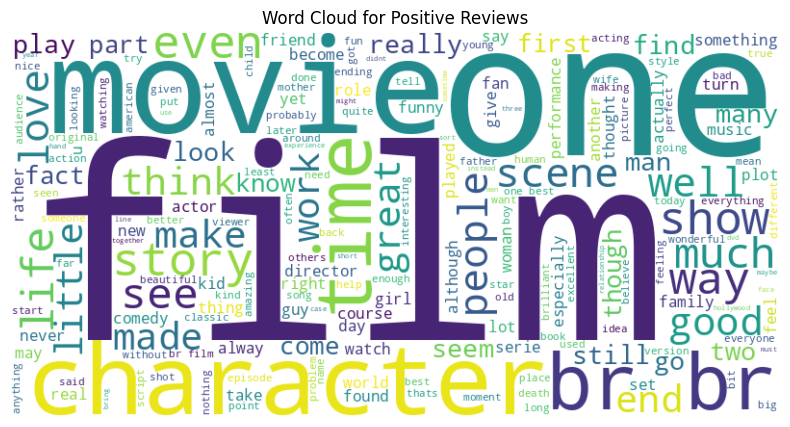

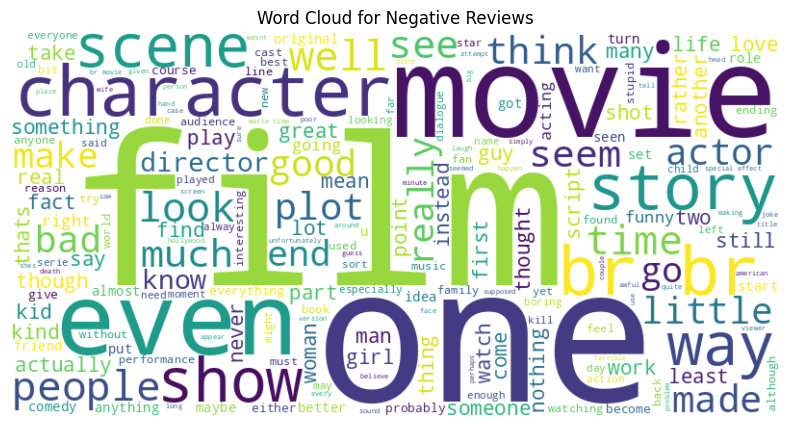

In [ ]:
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])

# Positive reviews word cloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Negative reviews word cloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

encoding and model fitting

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 features
X = vectorizer.fit_transform(df['cleaned_review']).toarray()

# Convert sentiment labels to binary (0 for negative, 1 for positive)
y = df['sentiment'].map({'negative': 0, 'positive': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 88.48%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



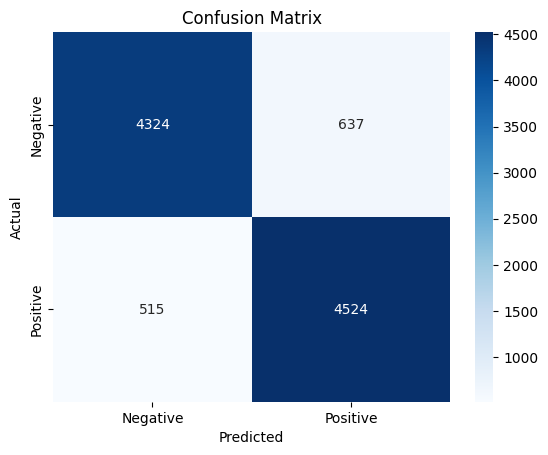

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()


Testing

In [ ]:
def predict_sentiment(review):
    # Preprocess the input review
    cleaned_review = preprocess_text(review)
    # Convert to TF-IDF features
    review_vector = vectorizer.transform([cleaned_review]).toarray()
    # Predict sentiment
    prediction = model.predict(review_vector)
    return "Positive" if prediction[0] == 1 else "Negative"

# Test with a custom review
test_review = "This movie was fantastic! The acting was superb and the storyline was captivating."
print(f"Predicted Sentiment: {predict_sentiment(test_review)}")


Predicted Sentiment: Positive
